# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [1036]:
# Importing Pandas
import seaborn as sb
import pandas as pd
from sklearn.preprocessing import StandardScaler

bookings_data = pd.read_csv('hotel_bookings.csv')

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [1037]:
# First we need to identify all the columns in the dataset

bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [1038]:
# After carefull consideration, I have decided that the following columns are redundant:
# arrival date columns - Date Columns are considered redundant for predictive analysis
# Country column
# Reservation Status and reservation status date - There is a column Is_canceled for that

bookings_data = bookings_data.drop(columns=['country','reservation_status_date','reservation_status','arrival_date_day_of_month','arrival_date_week_number','arrival_date_year','arrival_date_month','previous_bookings_not_canceled','market_segment'],axis=1)

## 1.1 Missing Values (10%)

Identify and handle missing values.

In [1039]:
# To start we need to identify the shape of our data after the column drop

bookings_data.shape

(119390, 23)

In [1040]:
# We continue then to find out the statistical summary of the data

bookings_data.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [1041]:
# looking back at the info column and now the description of the data the agent and company column have loads of missing values.

# after considerally reading the data information paper,I identified these columns contain ID's so there is no need for them

bookings_data = bookings_data.drop(columns=['company', 'agent'],axis=1)

In [1042]:
bookings_data.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       4
babies                         0
meal                           0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [1043]:
# We are left with the children column only with some null values, we will replace them with 0

bookings_data['children'] = bookings_data['children'].fillna(0)
bookings_data['children'].isna().sum() # This line is to check the code works

0

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [1044]:
# 403 Bookings have 0 adults, which is not sensible
bookings_data.adults.value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [1045]:
bookings_data.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [1046]:
bookings_data[['children','babies']].value_counts()

children  babies
0.0       0         110058
1.0       0           4718
2.0       0           3620
0.0       1            728
1.0       1            140
3.0       0             76
2.0       1             32
0.0       2             12
1.0       2              3
0.0       9              1
          10             1
10.0      0              1
Name: count, dtype: int64

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



In [1047]:
# Reservations with zero adults

bookings_data = bookings_data.drop(bookings_data[bookings_data['adults'] == 0].index)

In [1048]:
# Examining rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights'

bookings_data = bookings_data.drop(bookings_data[(bookings_data['stays_in_weekend_nights'] == 0) & (bookings_data['stays_in_week_nights'] == 0)].index)


In [1049]:
# After dropping all these columns an index reset is needed
bookings_data.reset_index(drop=True, inplace=True)

In [1050]:
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118342 entries, 0 to 118341
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118342 non-null  object 
 1   is_canceled                  118342 non-null  int64  
 2   lead_time                    118342 non-null  int64  
 3   stays_in_weekend_nights      118342 non-null  int64  
 4   stays_in_week_nights         118342 non-null  int64  
 5   adults                       118342 non-null  int64  
 6   children                     118342 non-null  float64
 7   babies                       118342 non-null  int64  
 8   meal                         118342 non-null  object 
 9   distribution_channel         118342 non-null  object 
 10  is_repeated_guest            118342 non-null  int64  
 11  previous_cancellations       118342 non-null  int64  
 12  reserved_room_type           118342 non-null  object 
 13 

## Handling Outliers

### Days in Waiting List column

<Axes: >

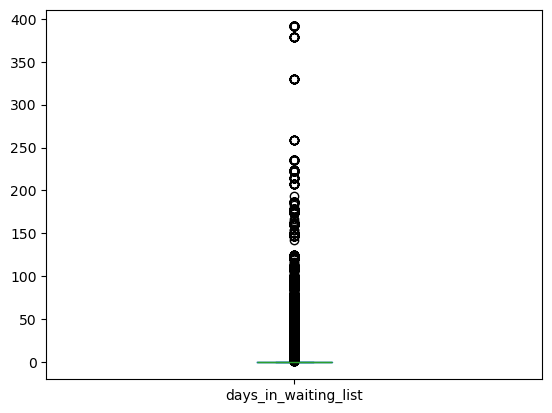

In [1051]:
bookings_data.plot(y=['days_in_waiting_list'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Booking Changes Column

<Axes: >

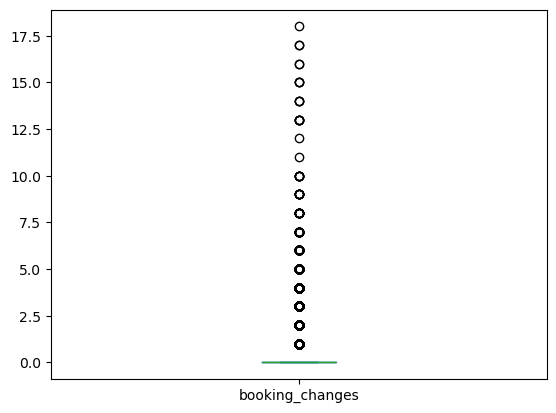

In [1052]:
bookings_data.plot(y=['booking_changes'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Previous Cancellations Column

<Axes: >

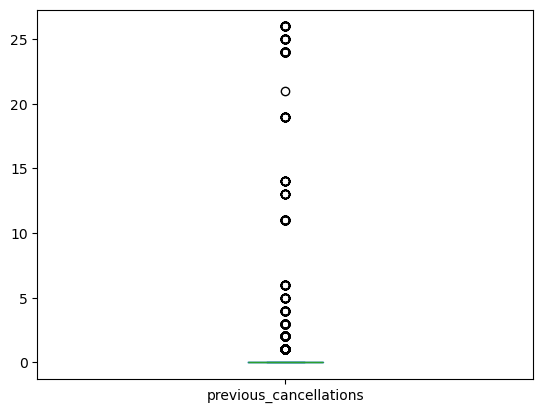

In [1053]:
bookings_data.plot(y=['previous_cancellations'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Is Repeated Guest Column

<Axes: >

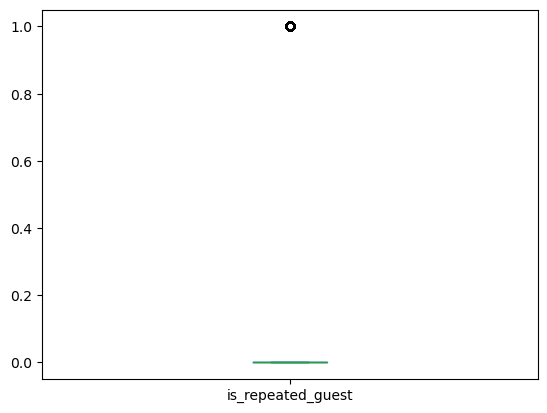

In [1054]:
bookings_data.plot(y=['is_repeated_guest'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Babies Column

<Axes: >

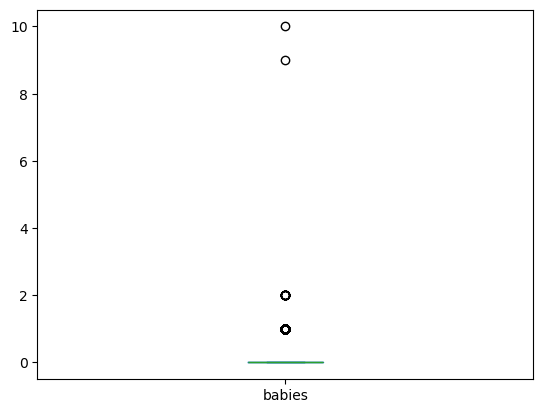

In [1055]:
bookings_data.plot(y=['babies'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Children Column

<Axes: >

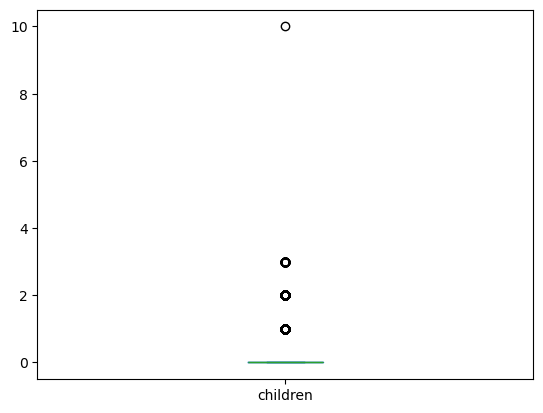

In [1056]:
bookings_data.plot(y=['children'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

### Lead Time Column

<Axes: >

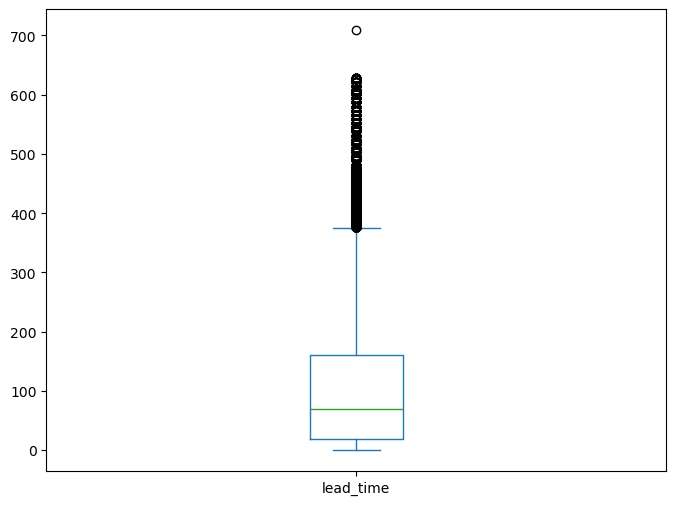

In [1057]:
bookings_data.plot(y=['lead_time'],kind='box',figsize=[8,6])

<Axes: >

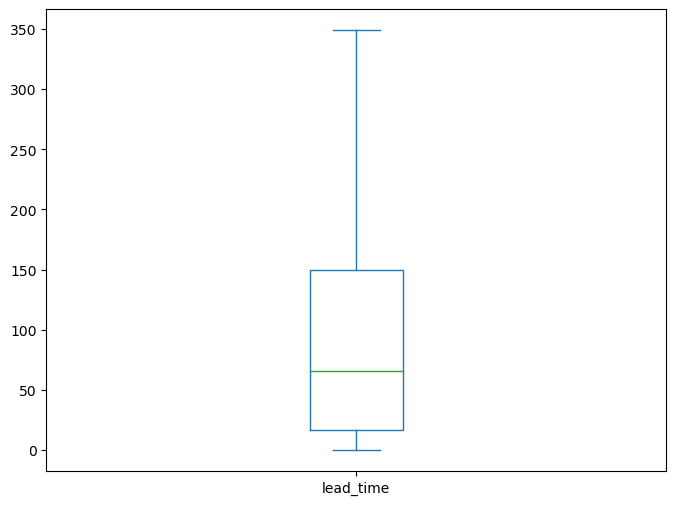

In [1058]:
bookings_data = bookings_data.drop(bookings_data[bookings_data['lead_time'] > 349].index)
bookings_data.plot(y=['lead_time'],kind='box',figsize=[8,6])

### Stays in Weekend Nights Column

<Axes: >

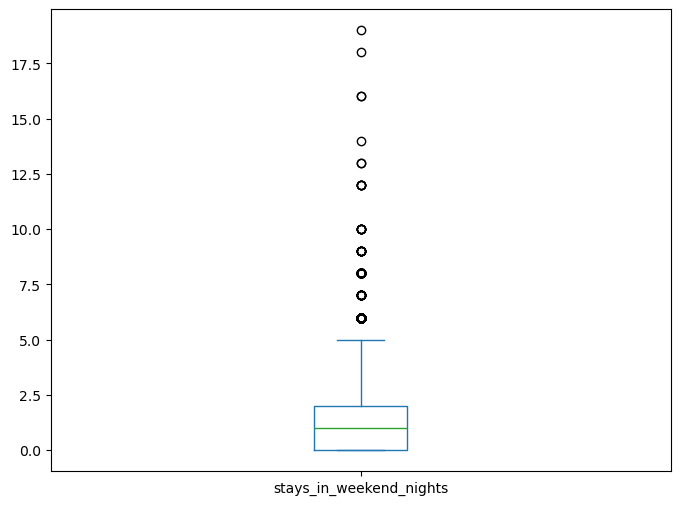

In [1059]:
bookings_data.plot(y=['stays_in_weekend_nights'],kind='box',figsize=[8,6])

<Axes: >

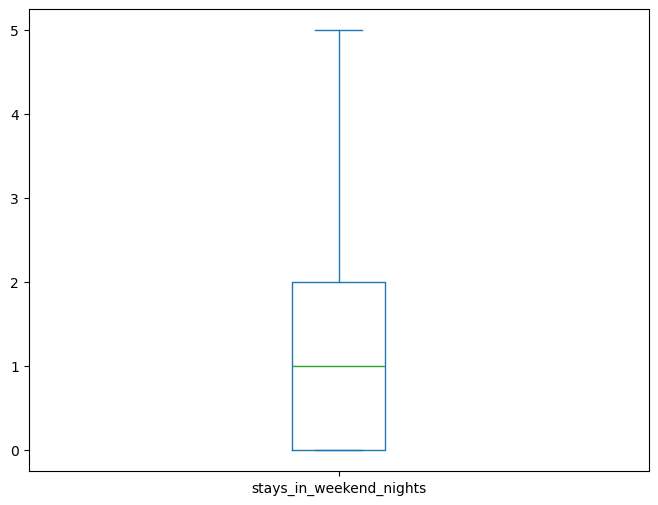

In [1060]:
bookings_data = bookings_data.drop(bookings_data[bookings_data['stays_in_weekend_nights'] > 5].index)
bookings_data.plot(y=['stays_in_weekend_nights'],kind='box',figsize=[8,6])

### Stays in Week Nights

<Axes: >

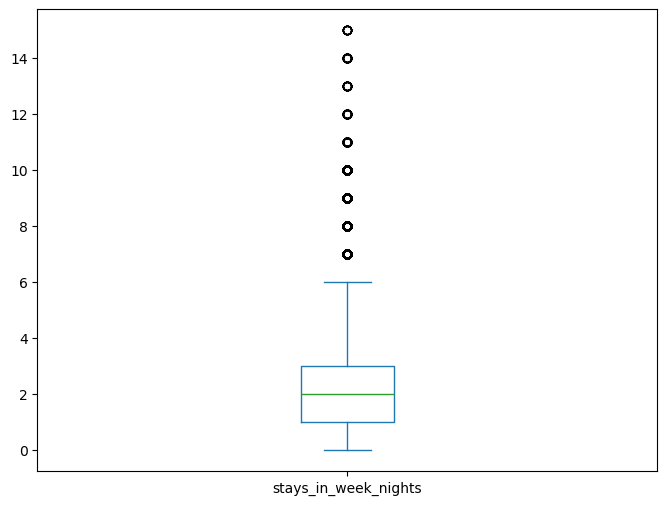

In [1061]:
bookings_data.plot(y=['stays_in_week_nights'],kind='box',figsize=[8,6])

<Axes: >

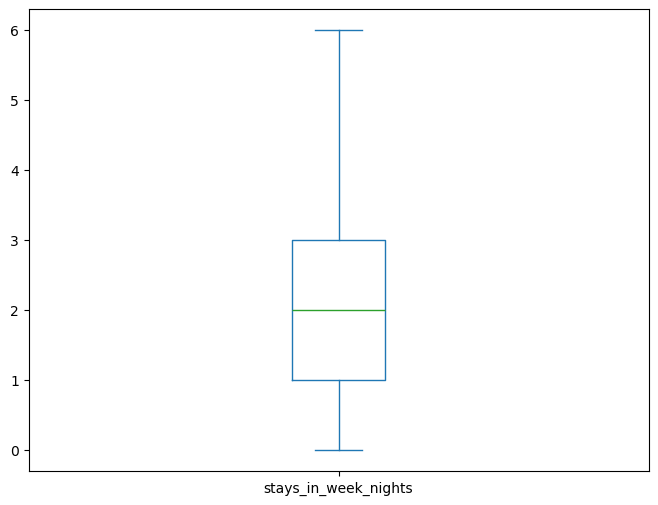

In [1062]:
bookings_data = bookings_data.drop(bookings_data[bookings_data['stays_in_week_nights'] > 6].index)
bookings_data.plot(y=['stays_in_week_nights'],kind='box',figsize=[8,6])

### ADR Column

<Axes: >

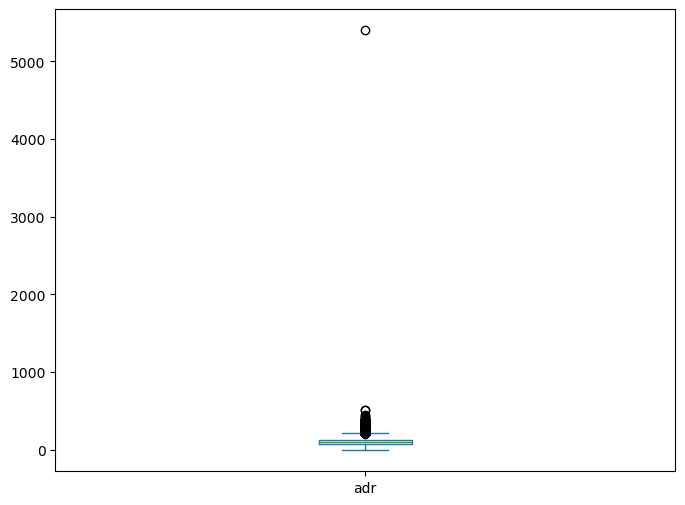

In [1063]:
bookings_data.plot(y=['adr'],kind='box',figsize=[8,6])

<Axes: >

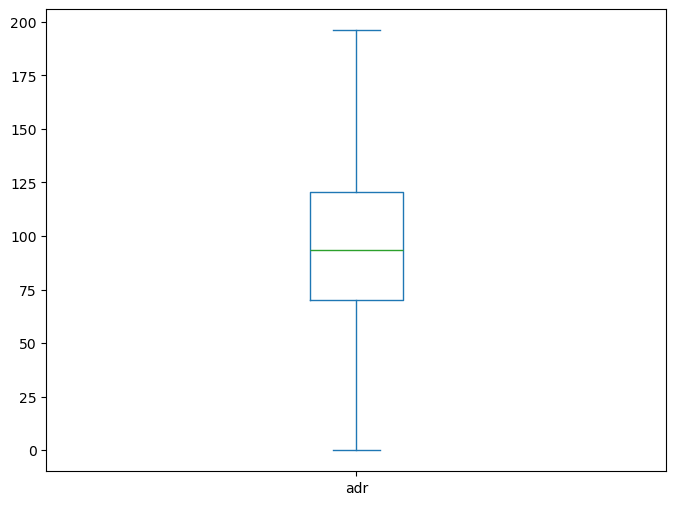

In [1064]:
bookings_data = bookings_data.drop(bookings_data[(bookings_data['adr'] > 196) | (bookings_data['adr'] < 0)].index)

bookings_data.plot(y=['adr'],kind='box',figsize=[8,6])

### Total Special Requests Column

<Axes: >

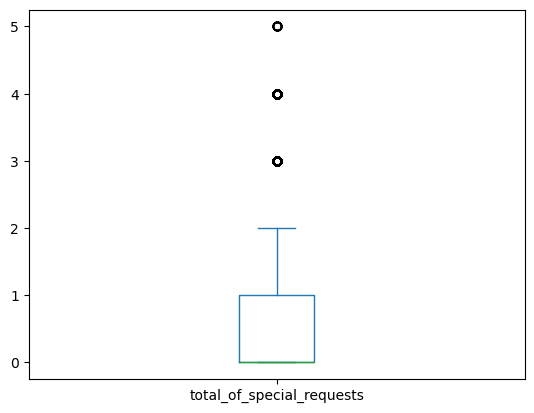

In [1065]:
bookings_data.plot(y=['total_of_special_requests'],kind='box')

<Axes: >

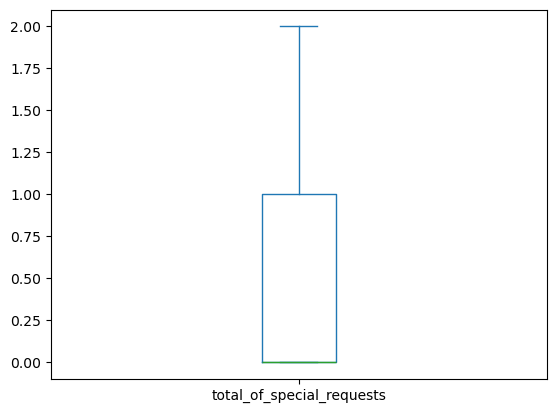

In [1066]:
bookings_data = bookings_data.drop(bookings_data[bookings_data['total_of_special_requests'] > 2].index)
bookings_data.plot(y=['total_of_special_requests'],kind='box')

### Adults Column

<Axes: >

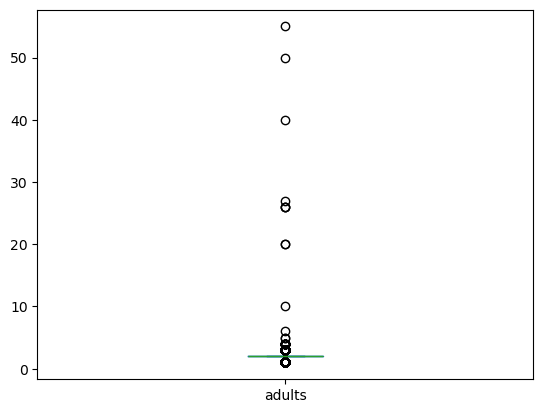

In [1067]:
bookings_data.plot(y=['adults'],kind='box')
# Outliers are vital for enhancing classification accuracy and insights.

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


Children column should be integer data type as it cointains number of children and this cant countain floats

In [1068]:
bookings_data['children'] = bookings_data['children'].astype('int64')

In [1069]:
bookings_data.hotel.value_counts()

hotel
City Hotel      71014
Resort Hotel    32408
Name: count, dtype: int64

# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

### Splitting Data for hotels

In [1070]:
hotel_name = bookings_data.hotel.unique()

In [1071]:
city_hotel_data = bookings_data.drop(bookings_data[bookings_data['hotel'] == hotel_name[0]].index)

resort_hotel_data = bookings_data.drop(bookings_data[bookings_data['hotel'] == hotel_name[1]].index)

# This code splits each hotel data into two different datasets so we can treat data dilligently

In [1072]:
# Getting the is_cancelled column into a variable
resort_is_canceled = resort_hotel_data.is_canceled.value_counts()

In [1073]:
# Getting the is_cancelled column into a variable
city_is_canceled = city_hotel_data.is_canceled.value_counts()

### Solution

To analyze the cancellation percentages for City and Resort hotels, I have compiled the data to highlight the comparative cancellation rates for each type of hotel.

<Axes: title={'center': 'Resort Hotel Cancellations Rate'}, ylabel='count'>

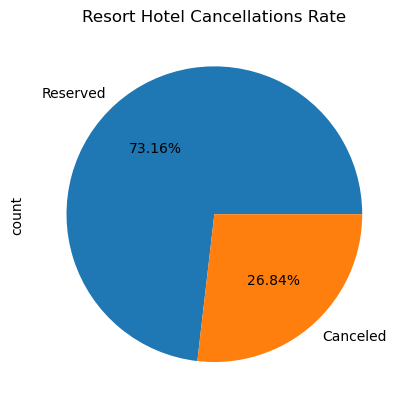

In [1074]:
# Resort Hotel Pie

resort_is_canceled.plot(kind='pie',labels={'Reserved','Canceled'},title='Resort Hotel Cancellations Rate',autopct='%.2f%%')

<Axes: title={'center': 'City Hotel Cancellations Rate'}, ylabel='count'>

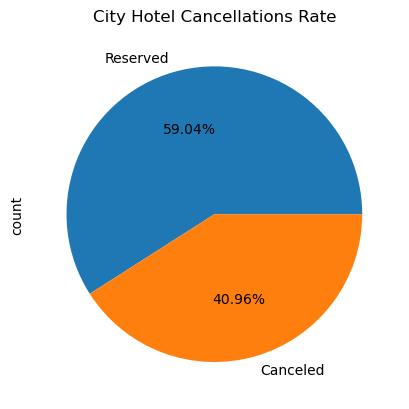

In [1075]:
# City Hotel Pie

city_is_canceled.plot(kind='pie',labels={'Reserved','Canceled'},title='City Hotel Cancellations Rate',autopct='%.2f%%')

### Conclusion
City Hotels exhibit a cancellation rate of 40.96%, while Resort Hotels show a cancellation rate of 26.84%.
This comparison indicates that City Hotels experience a higher cancellation rate than Resort Hotels, which may suggest differing traveler behaviors or market conditions.

## 2.2. Identifying the most frequently ordered meal types.

<Axes: title={'center': 'Meal Frequency'}, xlabel='meal'>

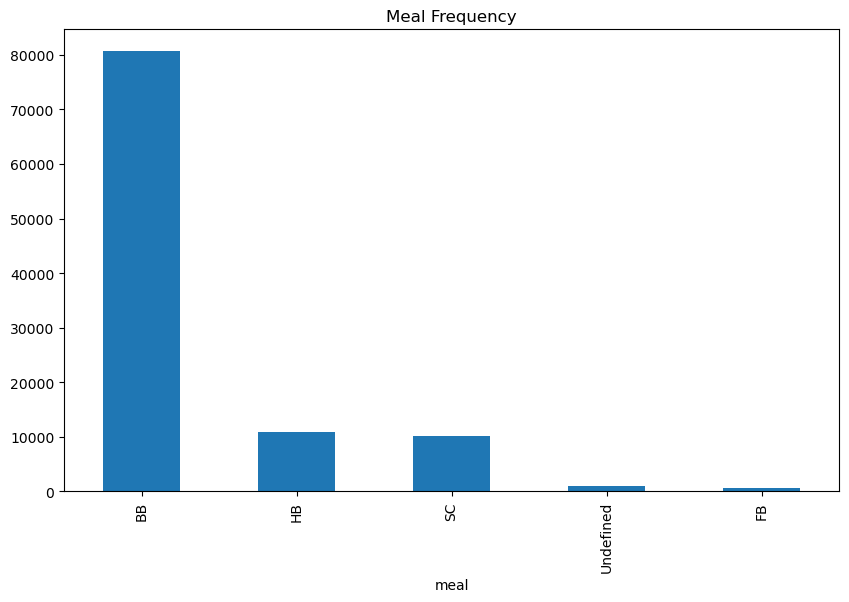

In [1076]:
# To solve this task we simply need to show the value counts of the meal column as a bar type chart

bookings_data.meal.value_counts().plot(kind='bar',title='Meal Frequency',figsize=[10,6])

### Solution

As observable in the bar chart the Bread and Breakfast is ordered over 80000 times making it the most popular and frequent type of meal.

## 2.3. Determining the number of returning guests.

<Axes: title={'center': 'Returning Guests'}, ylabel='count'>

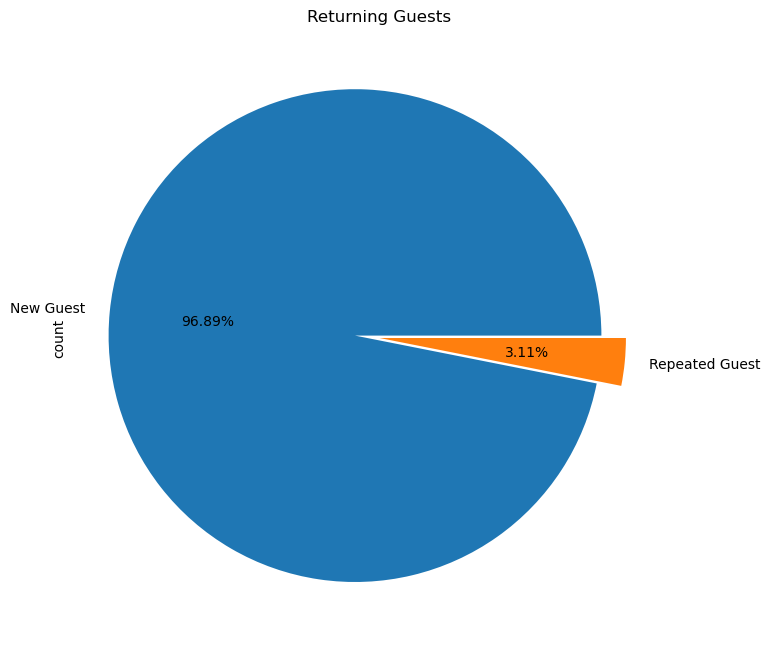

In [1077]:
explode = (0.1,0)
bookings_data.is_repeated_guest.value_counts().plot(kind='pie',labels={'New Guest','Repeated Guest'},figsize=[12,8],title='Returning Guests',explode = explode,autopct='%.2f%%')

In [1078]:
repeat_guests = bookings_data.is_repeated_guest.value_counts()
repeat_guests

is_repeated_guest
0    100204
1      3218
Name: count, dtype: int64

### Solution

The total amount of repeated guests is 3218

## 2.4. Discovering the most booked room types.

In [1079]:
room_type_chart = bookings_data.reserved_room_type.value_counts()
room_type_chart

reserved_room_type
A    77693
D    16410
E     4757
F     1742
G     1104
B      836
C      546
H      329
L        5
Name: count, dtype: int64

<Axes: xlabel='reserved_room_type'>

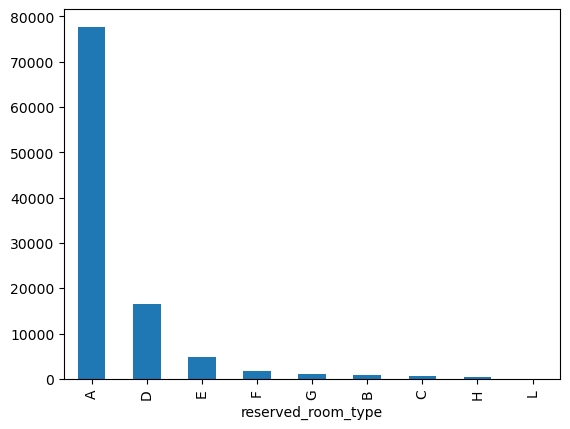

In [1080]:
room_type_chart.plot(kind='bar')

### Solution

The analysis indicates that Room A is the most frequently booked accommodation option.

## 2.5. Exploring correlations between room types and cancellations.

<Axes: >

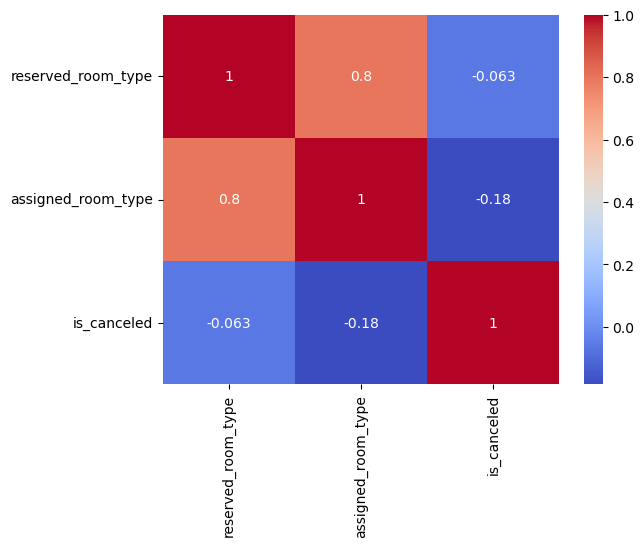

In [1081]:
bookings_data['reserved_room_type'] = bookings_data['reserved_room_type'].astype('category').cat.codes
bookings_data['assigned_room_type'] = bookings_data['assigned_room_type'].astype('category').cat.codes


room_cancellations = bookings_data[['reserved_room_type','assigned_room_type','is_canceled']]

corr = room_cancellations.corr().round(3)

sb.heatmap(corr,cmap="coolwarm",annot=True)


### Solution

1. Correlation between Assigned Room Type and Reserved Room Type (80%): The strong positive correlation of 80% indicates that there is a significant alignment between the room types that guests are assigned and the types they originally reserved. This suggests that the hotel’s allocation practices are largely effective in matching reservations to actual assignments. Such a high correlation may imply efficient management of room inventory and customer expectations, leading to higher satisfaction rates.
2. Inverse Correlation between Assigned Room Type and Cancellation Status (20%): The 20% inverse correlation between the assigned room type and the cancellation status implies that as the likelihood of a specific room type being assigned increases, the probability of cancellations decreases. Although this correlation is weaker, it still suggests that customers who receive their preferred room types are less likely to cancel their bookings. This insight could inform strategies to minimize cancellations by ensuring that customers are assigned the room types they originally selected.

### Conclusion
In summary, these correlations highlight the importance of aligning assigned and reserved room types to enhance guest satisfaction and reduce cancellations. Further investigation could explore the underlying factors contributing to these relationships and inform strategies for improving booking management.

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

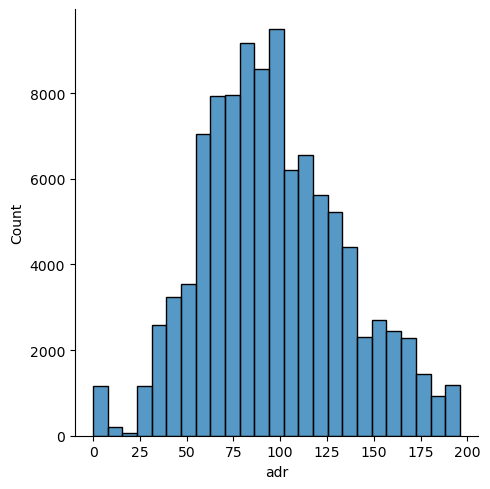

In [1082]:
sb.displot(data=bookings_data, x='adr', bins = 25)

## 3.2. Encoding

In [1083]:
# Before starting to encode we need to find information of the data itself

bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103422 entries, 0 to 118340
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        103422 non-null  object 
 1   is_canceled                  103422 non-null  int64  
 2   lead_time                    103422 non-null  int64  
 3   stays_in_weekend_nights      103422 non-null  int64  
 4   stays_in_week_nights         103422 non-null  int64  
 5   adults                       103422 non-null  int64  
 6   children                     103422 non-null  int64  
 7   babies                       103422 non-null  int64  
 8   meal                         103422 non-null  object 
 9   distribution_channel         103422 non-null  object 
 10  is_repeated_guest            103422 non-null  int64  
 11  previous_cancellations       103422 non-null  int64  
 12  reserved_room_type           103422 non-null  int8   
 13  assi

### Hotel Column Encoding

In [1084]:
# Using pandas cat.codes (Binary Column)
bookings_data['hotel'] = bookings_data['hotel'].astype('category').cat.codes

### Meal Column Encoding

In [1085]:
# Index Clean before encoding:
bookings_data.reset_index(drop=True, inplace=True)

In [1086]:
# Using one hot encoding scikit learn library
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder from sklearn
ohe = OneHotEncoder(sparse_output=False)


ohe_coded = ohe.fit_transform(bookings_data[['meal']])

# Convert the result into a DataFrame with proper column names
one_hot_df = pd.DataFrame(ohe_coded,columns=ohe.get_feature_names_out(['meal']))

# Drop the original 'meal' column
bookings_data = bookings_data.drop('meal', axis=1)

# Join the new one-hot encoded df back to the original
bookings_data = bookings_data.join(one_hot_df)

bookings_data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,distribution_channel,is_repeated_guest,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,1,0,7,0,1,1,0,0,Direct,0,...,0,Transient,75.00,0,0,1.0,0.0,0.0,0.0,0.0
1,1,0,13,0,1,1,0,0,Corporate,0,...,0,Transient,75.00,0,0,1.0,0.0,0.0,0.0,0.0
2,1,0,14,0,2,2,0,0,TA/TO,0,...,0,Transient,98.00,0,1,1.0,0.0,0.0,0.0,0.0
3,1,0,14,0,2,2,0,0,TA/TO,0,...,0,Transient,98.00,0,1,1.0,0.0,0.0,0.0,0.0
4,1,0,0,0,2,2,0,0,Direct,0,...,0,Transient,107.00,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103417,0,0,188,2,3,2,0,0,Direct,0,...,0,Transient,99.00,0,0,1.0,0.0,0.0,0.0,0.0
103418,0,0,164,2,4,2,0,0,TA/TO,0,...,0,Transient,87.60,0,0,1.0,0.0,0.0,0.0,0.0
103419,0,0,21,2,5,2,0,0,TA/TO,0,...,0,Transient,96.14,0,2,1.0,0.0,0.0,0.0,0.0
103420,0,0,23,2,5,2,0,0,TA/TO,0,...,0,Transient,96.14,0,0,1.0,0.0,0.0,0.0,0.0


### Distribution Channel Column

In [1087]:
# Apply OneHotEncoder to the 'distribution_channel' column
ohe_coded = ohe.fit_transform(bookings_data[['distribution_channel']])

# Convert the result into a DataFrame with proper column names
one_hot_df = pd.DataFrame(ohe_coded,columns=ohe.get_feature_names_out(['distribution_channel']))

# Drop the original 'distribution_channel' column
bookings_data = bookings_data.drop('distribution_channel', axis=1)

# Join the new one-hot encoded df back to the original
bookings_data = bookings_data.join(one_hot_df)

bookings_data


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,1,0,7,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0,13,0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,14,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,14,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103417,0,0,188,2,3,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
103418,0,0,164,2,4,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103419,0,0,21,2,5,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103420,0,0,23,2,5,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Deposit Type Column

In [1088]:
deposit_type = bookings_data.deposit_type.unique()

# Using the manual replacing as its considerably small amount of unique values in the column -> (No Deposit,Non Refund,Refundable)
bookings_data['deposit_type'] = bookings_data['deposit_type'].replace({deposit_type[0]: 0, deposit_type[1]: 1, deposit_type[2]: 2})

bookings_data.deposit_type.value_counts()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_21466/391467230.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bookings_data['deposit_type'] = bookings_data['deposit_type'].replace({deposit_type[0]: 0, deposit_type[1]: 1, deposit_type[2]: 2})


deposit_type
0    91086
2    12186
1      150
Name: count, dtype: int64

### Customer Type Column

In [1089]:
# Categorical Data encoding using scikitlearn one hot encoding:

# Apply OneHotEncoder to the 'customer_type' column
ohe_coded = ohe.fit_transform(bookings_data[['customer_type']])

# Convert the result into a DataFrame with proper column names
one_hot_df = pd.DataFrame(ohe_coded,columns=ohe.get_feature_names_out(['customer_type']))

# Drop the original 'customer_type' column
bookings_data = bookings_data.drop('customer_type', axis=1)

# Join the new one-hot encoded df back to the original
bookings_data = bookings_data.join(one_hot_df)

bookings_data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,7,0,1,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,13,0,1,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,14,0,2,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0,14,0,2,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,2,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103417,0,0,188,2,3,2,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103418,0,0,164,2,4,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
103419,0,0,21,2,5,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
103420,0,0,23,2,5,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 3.3. Scaling

### Standard Scaling

In [1090]:
std_scaler = StandardScaler()

bookings_data_standard = pd.DataFrame(std_scaler.fit_transform(bookings_data.values),columns=bookings_data.columns, index=bookings_data.index)

print("Scaled Dataset Using Standard Scaler")

bookings_data_standard

Scaled Dataset Using Standard Scaler


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,meal_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.480287,-0.758663,-0.954599,-0.985063,-0.917655,-1.479772,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,2.713188,-0.041987,-2.122493,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
1,1.480287,-0.758663,-0.888162,-0.985063,-0.917655,-1.479772,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,3.949428,-0.368570,-0.041987,-2.122493,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
2,1.480287,-0.758663,-0.877090,-0.985063,-0.208843,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,-0.368570,-0.041987,0.471144,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
3,1.480287,-0.758663,-0.877090,-0.985063,-0.208843,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,-0.368570,-0.041987,0.471144,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
4,1.480287,-0.758663,-1.032108,-0.985063,-0.208843,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,2.713188,-0.041987,-2.122493,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103417,-0.675545,-0.758663,1.049564,1.319226,0.499970,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,2.713188,-0.041987,-2.122493,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
103418,-0.675545,-0.758663,0.783819,1.319226,1.208782,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,-0.368570,-0.041987,0.471144,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
103419,-0.675545,-0.758663,-0.799581,1.319226,1.917594,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,-0.368570,-0.041987,0.471144,-0.006953,-0.176544,-0.069979,0.582122,-0.527989
103420,-0.675545,-0.758663,-0.777435,1.319226,1.917594,0.279987,-0.223194,-0.072267,-0.179205,-0.102956,...,-0.100296,-0.253201,-0.368570,-0.041987,0.471144,-0.006953,-0.176544,-0.069979,0.582122,-0.527989


## 3.4. Feature selection

In [1091]:
# The the variable to predict is 'is_canceled' 

x = bookings_data_standard.drop(columns='is_canceled')

y = bookings_data_standard.is_canceled

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [1092]:
# <<< Your code here >>>

## 4.2. Model Training (10%)

In [1093]:
# <<< Your code here >>>

## 4.3. Model Evaluation (5%)

In [1094]:
# <<< Your code here >>>

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

In [1095]:
# <<< Your code here >>>